In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import PIL
import numpy as np
from scipy import misc
import random
import shutil
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf


/Users/pavanshru/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [3]:
classes = {"human":"n02472987",
            "house":"n03544360"}

In [4]:
BASE_DIR = "/Users/pavanshru/Desktop/Shru-TAMUC/Jan-Spring19/AI-538/AI-Project/ImageNet_Utils"
get_class_path = lambda name:os.path.join(BASE_DIR, classes[name], "{}_urlimages".format(classes[name]))

In [6]:
def plot_pixel_dist(img_file):
    img = misc.imread(img_file)
    fig = plt.figure(figsize=(16,8))
   
    fig.add_subplot(1,2,1)
    plt.title("Image")
    plt.imshow(img)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))

    fig.add_subplot(1,2,2)
    plt.title("Histogram")
    plt.hist(img.flatten())
    plt.show()
    

/Users/pavanshru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


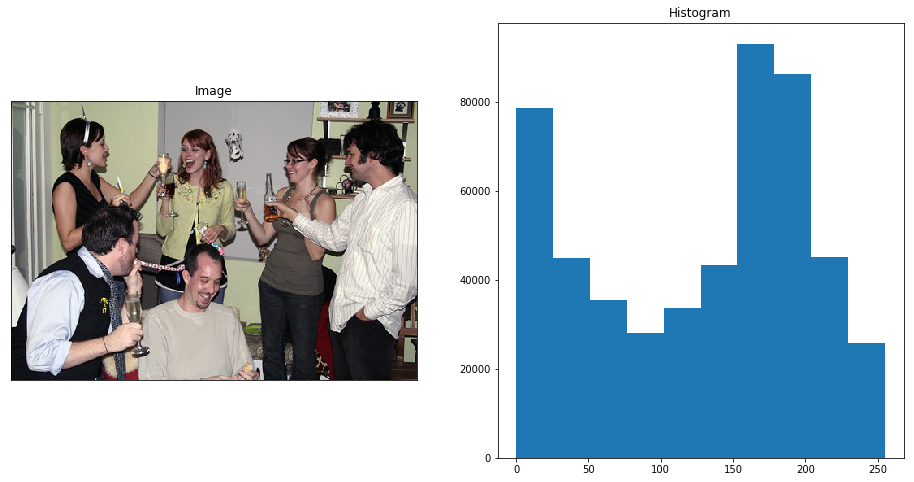

In [12]:
goodimg = "h2.jpg"
plot_pixel_dist(os.path.join(get_class_path("human"), goodimg))

/Users/pavanshru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


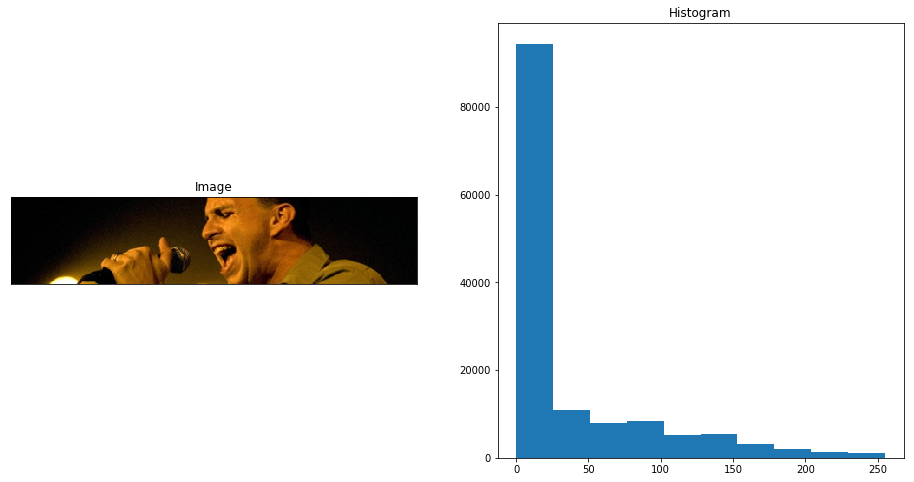

In [92]:
badimg="the_aggrolites_klein.jpg"
plot_pixel_dist(os.path.join(get_class_path("human"), badimg))

In [48]:
def filter_imgs(images):
    good_imgs = [] 
    bad_imgs = []
    for file in images:
        try:
            img = PIL.Image.open(file)
            v = img.histogram()
            h, w = img.size
            imagesize = float(h*w)
            monochrom_ratio = max(v)/imagesize
            if(monochrom_ratio < 0.5 or h<300 or w<300):
                bad_imgs.append(file)
            else:
                good_imgs.append(file)
        except (Exception):
            pass
    print('Good Images are: {}'.format(len(good_imgs)))
    print('Bad Images are: {}'.format(len(bad_imgs)))
    return good_imgs, bad_imgs
          

In [49]:
class_dir = get_class_path("human")
human_imgs = map(lambda f: os.path.join(class_dir, f), os.listdir(class_dir) )

g_imgs, b_imgs = filter_imgs(human_imgs)

Good Images are: 10
Bad Images are: 443


In [68]:
def plot_img_grid(image_files):
    fig = plt.figure(figsize=(8,8))
    
    images=[tf.contrib.keras.preprocessing.image.load_img(img) for img in image_files]
   
    for i in range(5):
        for j in range(5):
            fig.add_subplot(5,5,5*i+j+1)
            plt.title("Image-{}-{}".format(i,j))
            plt.imshow(images[5*i+j])
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()



Class Name: human

Good Images are: 10
Bad Images are: 443


IndexError: list index out of range

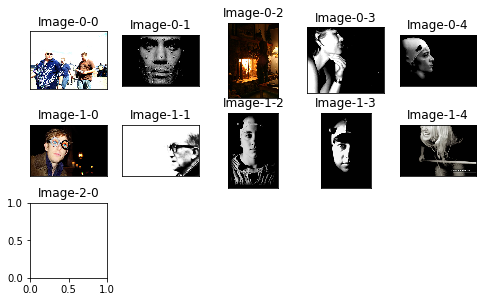

In [80]:
data_dic = {}
for class_name,wind_number in classes.items():

    print("Class Name: {}\n".format(class_name))
    class_dir = get_class_path(class_name)
    class_images = map(lambda f:os.path.join(class_dir,f),os.listdir(class_dir))
    
    g_images,b_images = filter_imgs(class_images)
    
    random.shuffle(g_images)
    data_dic[class_name] = g_images
    
    plot_img_grid(g_images[:16])

In [81]:
def copy_files_to_dir(files, directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print('new dir created: {}'.format(directory))
    for f in files:
        shutil.copy(f, directory)
    print("Copied files")

In [87]:
def train_validation_seperation(base_dir, data_dic, split_ratio=0.2):
    IMAGENET_DATASET = os.path.join(base_dir, "imageNet_dataSet")
    
    if not os.path.exists(IMAGENET_DATASET):
        os.makedirs(IMAGENET_DATASET)
    
    for classname, imgs in data_dic.items():
        idx_split = int(len(imgs) * split_ratio)
        random.shuffle(imgs)
        validation = imgs[:idx_split]
        train = imgs[idx_split:]
        copy_files_to_dir(train, os.path.join(IMAGENET_DATASET, "train", class_name))
        copy_files_to_dir(validation, os.path.join(IMAGENET_DATASET, "validation", class_name))


        

In [88]:
train_validation_seperation(BASE_DIR, data_dic, split_ratio=0.4)

Copied files
Copied files
